## 💳 Credit Card Fraud Detection Project

This project builds a machine learning model to detect fraudulent transactions in a credit card dataset. It includes:

- Data preprocessing and scaling
- Handling class imbalance using SMOTE
- Model training (Logistic Regression & Random Forest)
- Evaluation using ROC-AUC, classification report, and confusion matrix


In [1]:
!pip install imbalanced-learn --quiet

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [24]:
# Load the dataset
df = pd.read_csv('/content/creditcard.csv')


<ipython-input-25-d426942d0236>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=class_counts.values, palette='rocket')


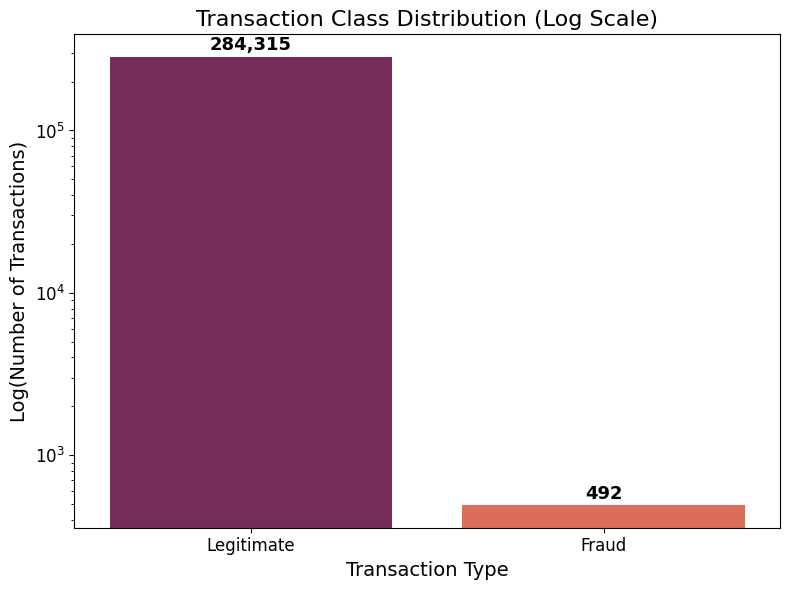

In [25]:
#Visualize class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=class_counts.values, palette='rocket')

plt.yscale('log')  # Apply log scale
plt.title('Transaction Class Distribution (Log Scale)', fontsize=16)
plt.ylabel('Log(Number of Transactions)', fontsize=14)
plt.xlabel('Transaction Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars
for i, val in enumerate(class_counts.values):
    plt.text(i, val * 1.1, f'{val:,}', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


In [26]:
# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [27]:
# Features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [30]:
# Train models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [31]:
lr.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Logistic Regression - Confusion Matrix:
[[55406  1458]
 [    8    90]]
Logistic Regression - ROC AUC Score: 0.9698


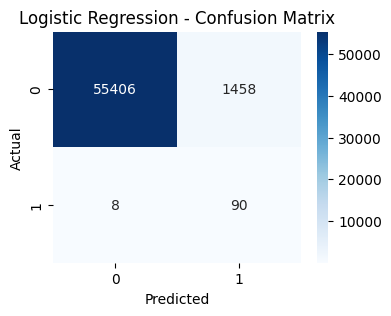


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest - Confusion Matrix:
[[56849    15]
 [   16    82]]
Random Forest - ROC AUC Score: 0.9731


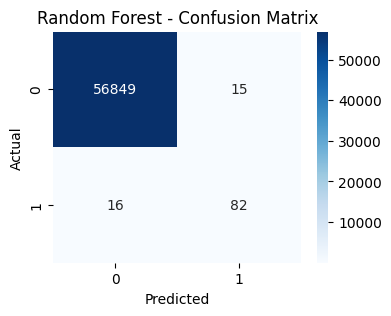

In [40]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))
    print(f"{name} - Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} - ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_prob
# Evaluate both models
lr_probs = evaluate(lr, "Logistic Regression")
rf_probs = evaluate(rf, "Random Forest")


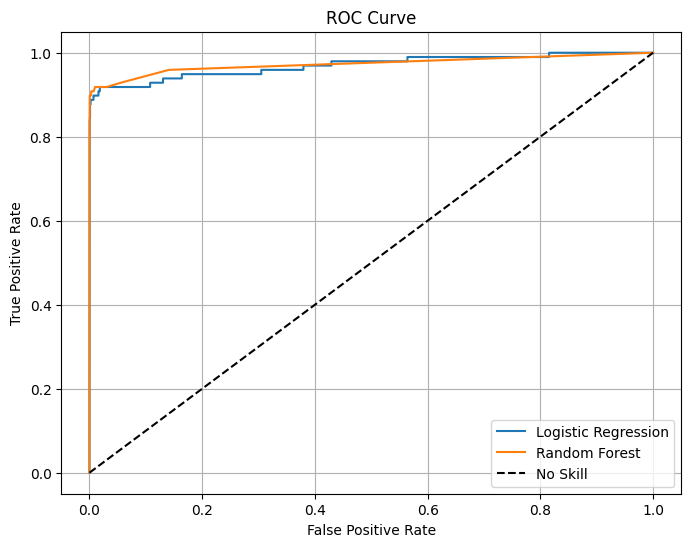

In [34]:
# Plot ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()